# 주식과 채권 배분

### 라이브러리 불러오기

In [17]:
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 가격 데이터 받아오기

In [14]:
tickers = ['SPY', 'TLT']

etf = yf.Tickers(tickers)

data = etf.history(start='2010-01-01',actions=False)
data

[*********************100%%**********************]  2 of 2 completed


Close                   High                    Low  \
                   SPY        TLT         SPY        TLT         SPY   
Date                                                                   
2010-01-04   87.483185  62.333035   87.529499  62.534311   86.078267   
2010-01-05   87.714783  62.735561   87.753382  62.902133   87.112676   
2010-01-06   87.776543  61.895729   87.992683  62.645309   87.560402   
2010-01-07   88.147049  61.999863   88.255119  62.215018   87.367395   
2010-01-08   88.440422  61.972092   88.479021  62.159484   87.737966   
...                ...        ...         ...        ...         ...   
2023-10-12  433.660004  86.070000  437.339996  88.190002  431.230011   
2023-10-13  431.500000  87.610001  436.450012  87.830002  429.880005   
2023-10-16  436.040009  86.199997  437.140015  86.370003  433.570007   
2023-10-17  436.019989  85.250000  438.140015  85.629997  432.450012   
2023-10-18  433.679993  84.610001  434.779999  84.639999  433.627014   

                             Open                Volume            
                  TLT         SPY        TLT        SPY       TLT  
Date                                                               
2010-01-04  62.173405   86.742130  62.353855  118944600   2829100  
2010-01-05  62.464881   87.429171  62.499585  111579900   2841600  
2010-01-06  61.854088   87.629873  62.582841  116074400   4099600  
2010-01-07  61.854112   87.614413  61.923516  131091100   2793200  
2010-01-08  61.604244   87.915507  62.124784  126402800   2910700  
...               ...         ...        ...        ...       ...  
2023-10-12  85.930000  436.950012  88.050003   81154200  66986700  
2023-10-13  87.169998  435.209991  87.599998   95143100  44183800  
2023-10-16  85.900002  433.820007  86.190002   75433200  38309800  
2023-10-17  84.500000  432.809998  84.889999   75169500  52903500  
2023-10-18  84.349998  432.809998  84.889999    4330135   4654943  

[3472 rows x 10 columns]

In [15]:
data = data['Close']
data

,SPY,TLT
Date,,
2010-01-04,87.483185,62.333035
2010-01-05,87.714783,62.735561
2010-01-06,87.776543,61.895729
2010-01-07,88.147049,61.999863
2010-01-08,88.440422,61.972092
...,...,...
2023-10-12,433.660004,86.070000
2023-10-13,431.500000,87.610001
2023-10-16,436.040009,86.199997


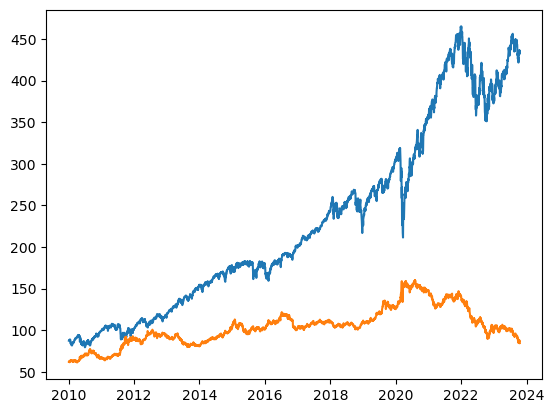

In [16]:
plt.plot(data)

### 일별 수익률 데이터

In [18]:
rets = data.pct_change().fillna(0)

<Axes: xlabel='Date'>

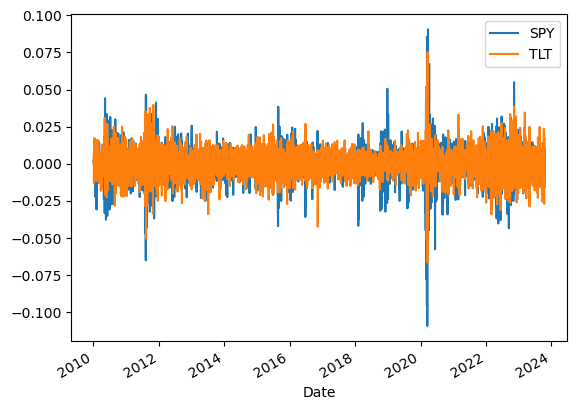

In [19]:
rets.plot()

### 개별 자산 평균 수익률과 변동성, 샤프비율

In [21]:
# 주식
stock_mu = rets['SPY'].mean() * 252 # 기대 수익률
stock_sigma = rets['SPY'].std() * np.sqrt(252)  # 변동성
stock_sr = stock_mu / stock_sigma # 샤프 비율

# 채권
bond_mu = rets['TLT'].mean() * 252 # 기대 수익률
bond_sigma = rets['TLT'].std() * np.sqrt(252)  # 변동성
bond_sr = bond_mu / bond_sigma # 샤프 비율

print(f"주식 샤프 : {stock_sr}, 채권 샤프 : {bond_sr}")

주식 샤프 : 0.755696664961029, 채권 샤프 : 0.2215526734581357


### 주식, 채권 비율별 포트폴리오 구현

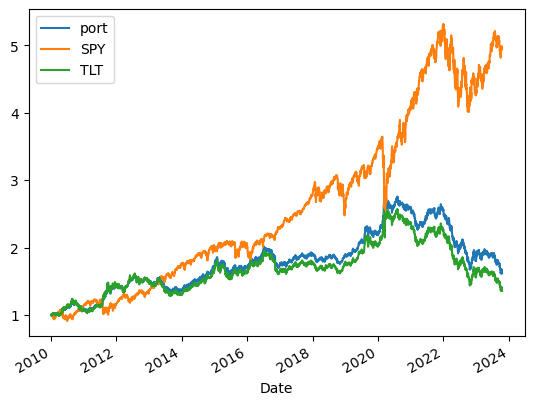

주식 비율, 0.1
채권 비율, 0.9


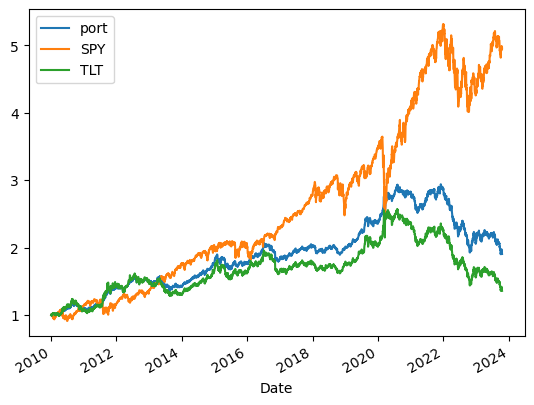

주식 비율, 0.2
채권 비율, 0.8


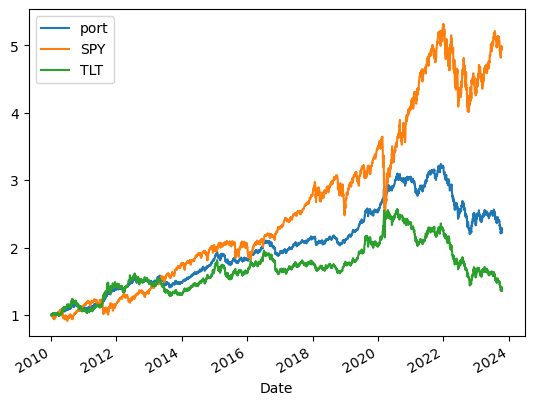

주식 비율, 0.3
채권 비율, 0.7


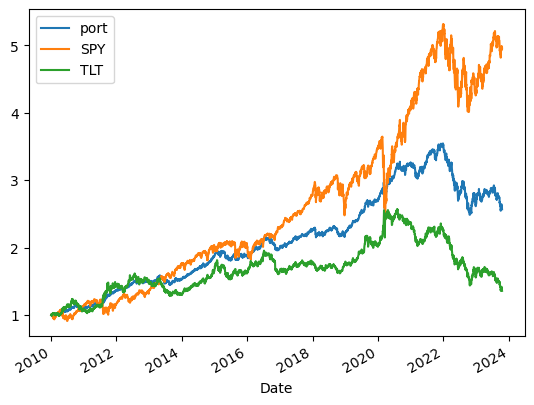

주식 비율, 0.4
채권 비율, 0.6


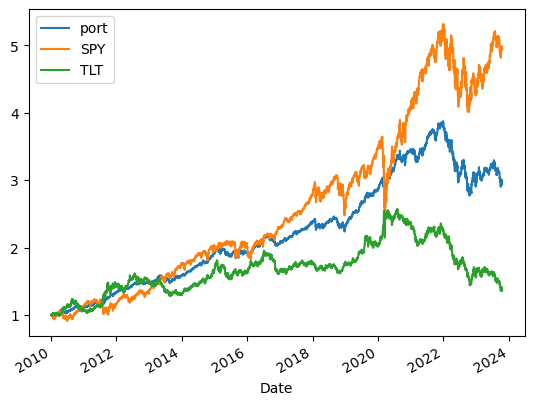

주식 비율, 0.5
채권 비율, 0.5


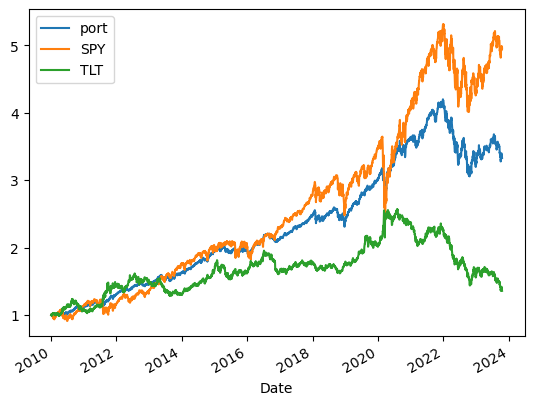

주식 비율, 0.6
채권 비율, 0.4


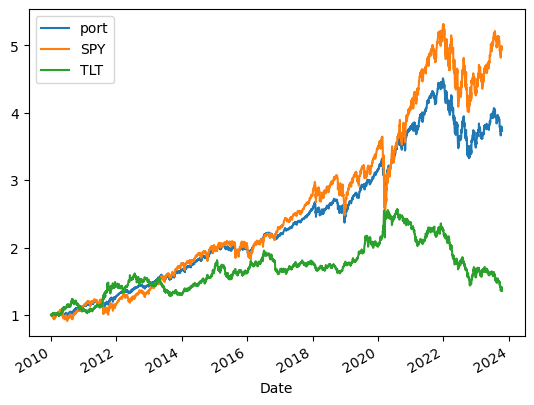

주식 비율, 0.7
채권 비율, 0.3


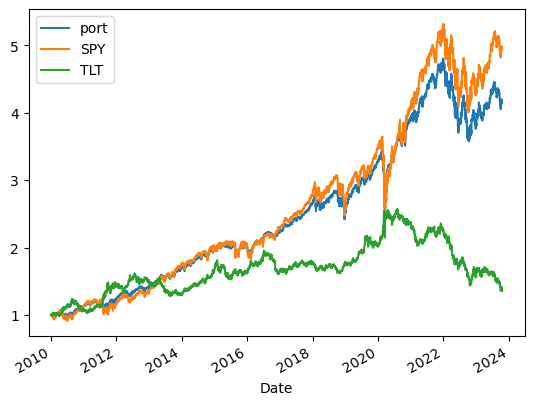

주식 비율, 0.8
채권 비율, 0.2


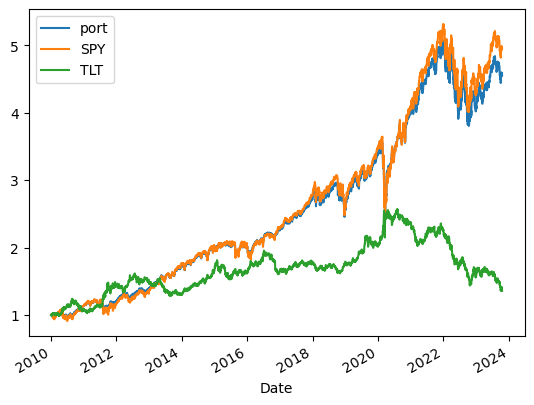

주식 비율, 0.9
채권 비율, 0.1


In [60]:
ports = [] # 포트폴리오 리스트

for weights in range(1, 10): # 가중치 설정 (비율 설정)
    plt.clf()
    weights /= 10
    port_ret = weights * rets['SPY'] + round(1 - weights, 2) * rets['TLT'] # 포트폴리오 수익률
    ports.append(prot_ret)
    (1 + port_ret).cumprod().plot(label='port')
    (1 + rets['SPY']).cumprod().plot(label='SPY')
    (1 + rets['TLT']).cumprod().plot(label='TLT')
    plt.legend()
    plt.show()
    print(f"주식 비율, {weights}")
    print(f"채권 비율, {round(1 - weights,2)}")

### 포트폴리오별 수익률과 변동성 분석

In [61]:
for i, port_ret in enumerate(ports): # 포트폴리오별 수익률 및 변동성
    port_mu = port_ret.mean() * 252 # 연평균 수익률
    port_sigma = port_ret.std() * np.sqrt(252) # 연평균 변동성
    print(f"주식 {int(i+1)/10}, 채권 {round(1-(i+1)/10, 2)}")
    print(f"포트폴리오 \n수익률 : {port_mu}\n변동성 : {port_sigma}\n샤프 : {port_mu/port_sigma}\n")

주식 0.1, 채권 0.9
포트폴리오 
수익률 : 0.09236561304394149
변동성 : 0.10062576479114144
샤프 : 0.9179121593327048

주식 0.2, 채권 0.8
포트폴리오 
수익률 : 0.09236561304394149
변동성 : 0.10062576479114144
샤프 : 0.9179121593327048

주식 0.3, 채권 0.7
포트폴리오 
수익률 : 0.09236561304394149
변동성 : 0.10062576479114144
샤프 : 0.9179121593327048

주식 0.4, 채권 0.6
포트폴리오 
수익률 : 0.09236561304394149
변동성 : 0.10062576479114144
샤프 : 0.9179121593327048

주식 0.5, 채권 0.5
포트폴리오 
수익률 : 0.09236561304394149
변동성 : 0.10062576479114144
샤프 : 0.9179121593327048

주식 0.6, 채권 0.4
포트폴리오 
수익률 : 0.09236561304394149
변동성 : 0.10062576479114144
샤프 : 0.9179121593327048

주식 0.7, 채권 0.3
포트폴리오 
수익률 : 0.09236561304394149
변동성 : 0.10062576479114144
샤프 : 0.9179121593327048

주식 0.8, 채권 0.2
포트폴리오 
수익률 : 0.09236561304394149
변동성 : 0.10062576479114144
샤프 : 0.9179121593327048

주식 0.9, 채권 0.1
포트폴리오 
수익률 : 0.09236561304394149
변동성 : 0.10062576479114144
샤프 : 0.9179121593327048



### 주식-채권 상관계수 분석

In [62]:
historical_corr = rets['SPY'].rolling(252).corr(rets['TLT'])
historical_corr.dropna()

Date
2010-12-31   -0.554659
2011-01-03   -0.555864
2011-01-04   -0.556754
2011-01-05   -0.556754
2011-01-06   -0.557187
                ...   
2023-10-12    0.134450
2023-10-13    0.131059
2023-10-16    0.134884
2023-10-17    0.130394
2023-10-18    0.137073
Length: 3221, dtype: float64

<Axes: xlabel='Date'>

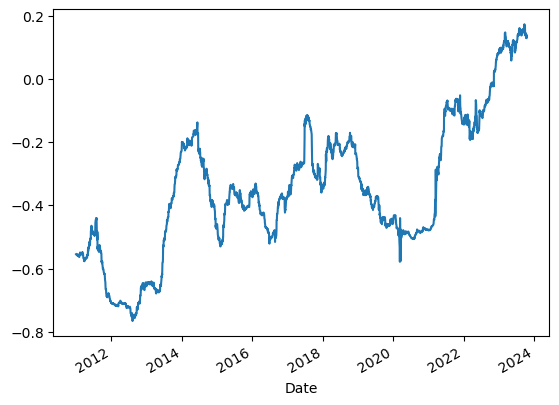

In [63]:
historical_corr.plot()